<a href="https://colab.research.google.com/github/P-Tharun-cse/DS100002/blob/main/data_softixs_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df1 = pd.read_csv('ColesSalesData1.csv')
df2 = pd.read_csv('ColesStoreData2.csv')

In [2]:
#renaming the column Coles_StoreIDno in df1 to match the column name in df2
df1 = df1.rename(columns={'Coles_StoreIDno': 'Coles_StoreID'})
print("changed column name check:")
print(df1.head())

changed column name check:
   Unnamed: 0 Coles_StoreIDNo  Expec_Revenue  Gross_Sale  Sales_Cost  \
0           1            C524             39          56         6.0   
1           2            C624             22          55         7.0   
2           3            C460             36          51         7.0   
3           4            C708             48          50        10.0   
4           5            C647             23          39        18.0   

  Targeted_Quarter Coles_Forecast  
0          Q2 2023      On Target  
1          Q1 2023      On Target  
2          Q1 2023      On Target  
3          Q1 2023   Below Target  
4          Q2 2023   Below Target  


In [3]:
df1 = df1.rename(columns={'Coles_StoreIDNo': 'Coles_StoreID'})
print("Columns in df1:", df1.columns)
print("Columns in df2:", df2.columns)
merged_df = pd.merge(df1, df2, on='Coles_StoreID', how='inner')

# Display the merged dataset
print("Merged Dataset:")
print(merged_df.head())

Columns in df1: Index(['Unnamed: 0', 'Coles_StoreID', 'Expec_Revenue', 'Gross_Sale',
       'Sales_Cost', 'Targeted_Quarter', 'Coles_Forecast'],
      dtype='object')
Columns in df2: Index(['Unnamed: 0', 'Coles_StoreID', 'Store_Location', 'Customer_Count',
       'Staff_Count', 'Store_Area'],
      dtype='object')
Merged Dataset:
   Unnamed: 0_x Coles_StoreID  Expec_Revenue  Gross_Sale  Sales_Cost  \
0             1          C524             39          56         6.0   
1             2          C624             22          55         7.0   
2             3          C460             36          51         7.0   
3             4          C708             48          50        10.0   
4             5          C647             23          39        18.0   

  Targeted_Quarter Coles_Forecast  Unnamed: 0_y Store_Location  \
0          Q2 2023      On Target             1            QLD   
1          Q1 2023      On Target             2            NSW   
2          Q1 2023      On Target    

In [5]:
merged_df = merged_df.drop(columns=['Unnamed: 0_y'])
merged_df = merged_df.rename(columns={'Unnamed: 0_x': 'S.No'})
print(merged_df.head())

   S.No Coles_StoreID  Expec_Revenue  Gross_Sale  Sales_Cost Targeted_Quarter  \
0     1          C524             39          56         6.0          Q2 2023   
1     2          C624             22          55         7.0          Q1 2023   
2     3          C460             36          51         7.0          Q1 2023   
3     4          C708             48          50        10.0          Q1 2023   
4     5          C647             23          39        18.0          Q2 2023   

  Coles_Forecast Store_Location  Customer_Count  Staff_Count  Store_Area  
0      On Target            QLD         18445.0           36        2500  
1      On Target            NSW         40535.0           37        2500  
2      On Target            VIC          6146.0           19        1900  
3   Below Target             SA          9151.0           23        1900  
4   Below Target            NSW          9308.0           23        1700  


In [6]:
merged_df.to_csv('Merged_ColesData.csv', index=False)
df3 = pd.read_csv('Merged_ColesData.csv')


In [7]:
#data cleaning process
# Check for missing values
print(df3.isnull().sum())
# Drop rows with missing values (if necessary)
df3 = df3.dropna()

S.No                 0
Coles_StoreID        0
Expec_Revenue        0
Gross_Sale           0
Sales_Cost          15
Targeted_Quarter     0
Coles_Forecast      15
Store_Location       0
Customer_Count      57
Staff_Count          0
Store_Area           0
dtype: int64


In [8]:
print(df3.isnull().sum())

S.No                0
Coles_StoreID       0
Expec_Revenue       0
Gross_Sale          0
Sales_Cost          0
Targeted_Quarter    0
Coles_Forecast      0
Store_Location      0
Customer_Count      0
Staff_Count         0
Store_Area          0
dtype: int64


In [9]:
# Calculate total sales
total_sales = df3['Gross_Sale'].sum()
print(f"Total Sales: {total_sales}")

# Calculate average sales
average_sales = df3['Gross_Sale'].mean()
print(f"Average Sales: {average_sales}")


# Calculate sales trends over time (e.g., monthly sales)
#df3['Month'] = df3['Date'].dt.to_period('M')  # Extract month from date
#monthly_sales = df3.groupby('Month')['Gross_Sale'].sum()
#print("Monthly Sales Trends:")
#print(monthly_sales)

Total Sales: 26084
Average Sales: 42.690671031096564


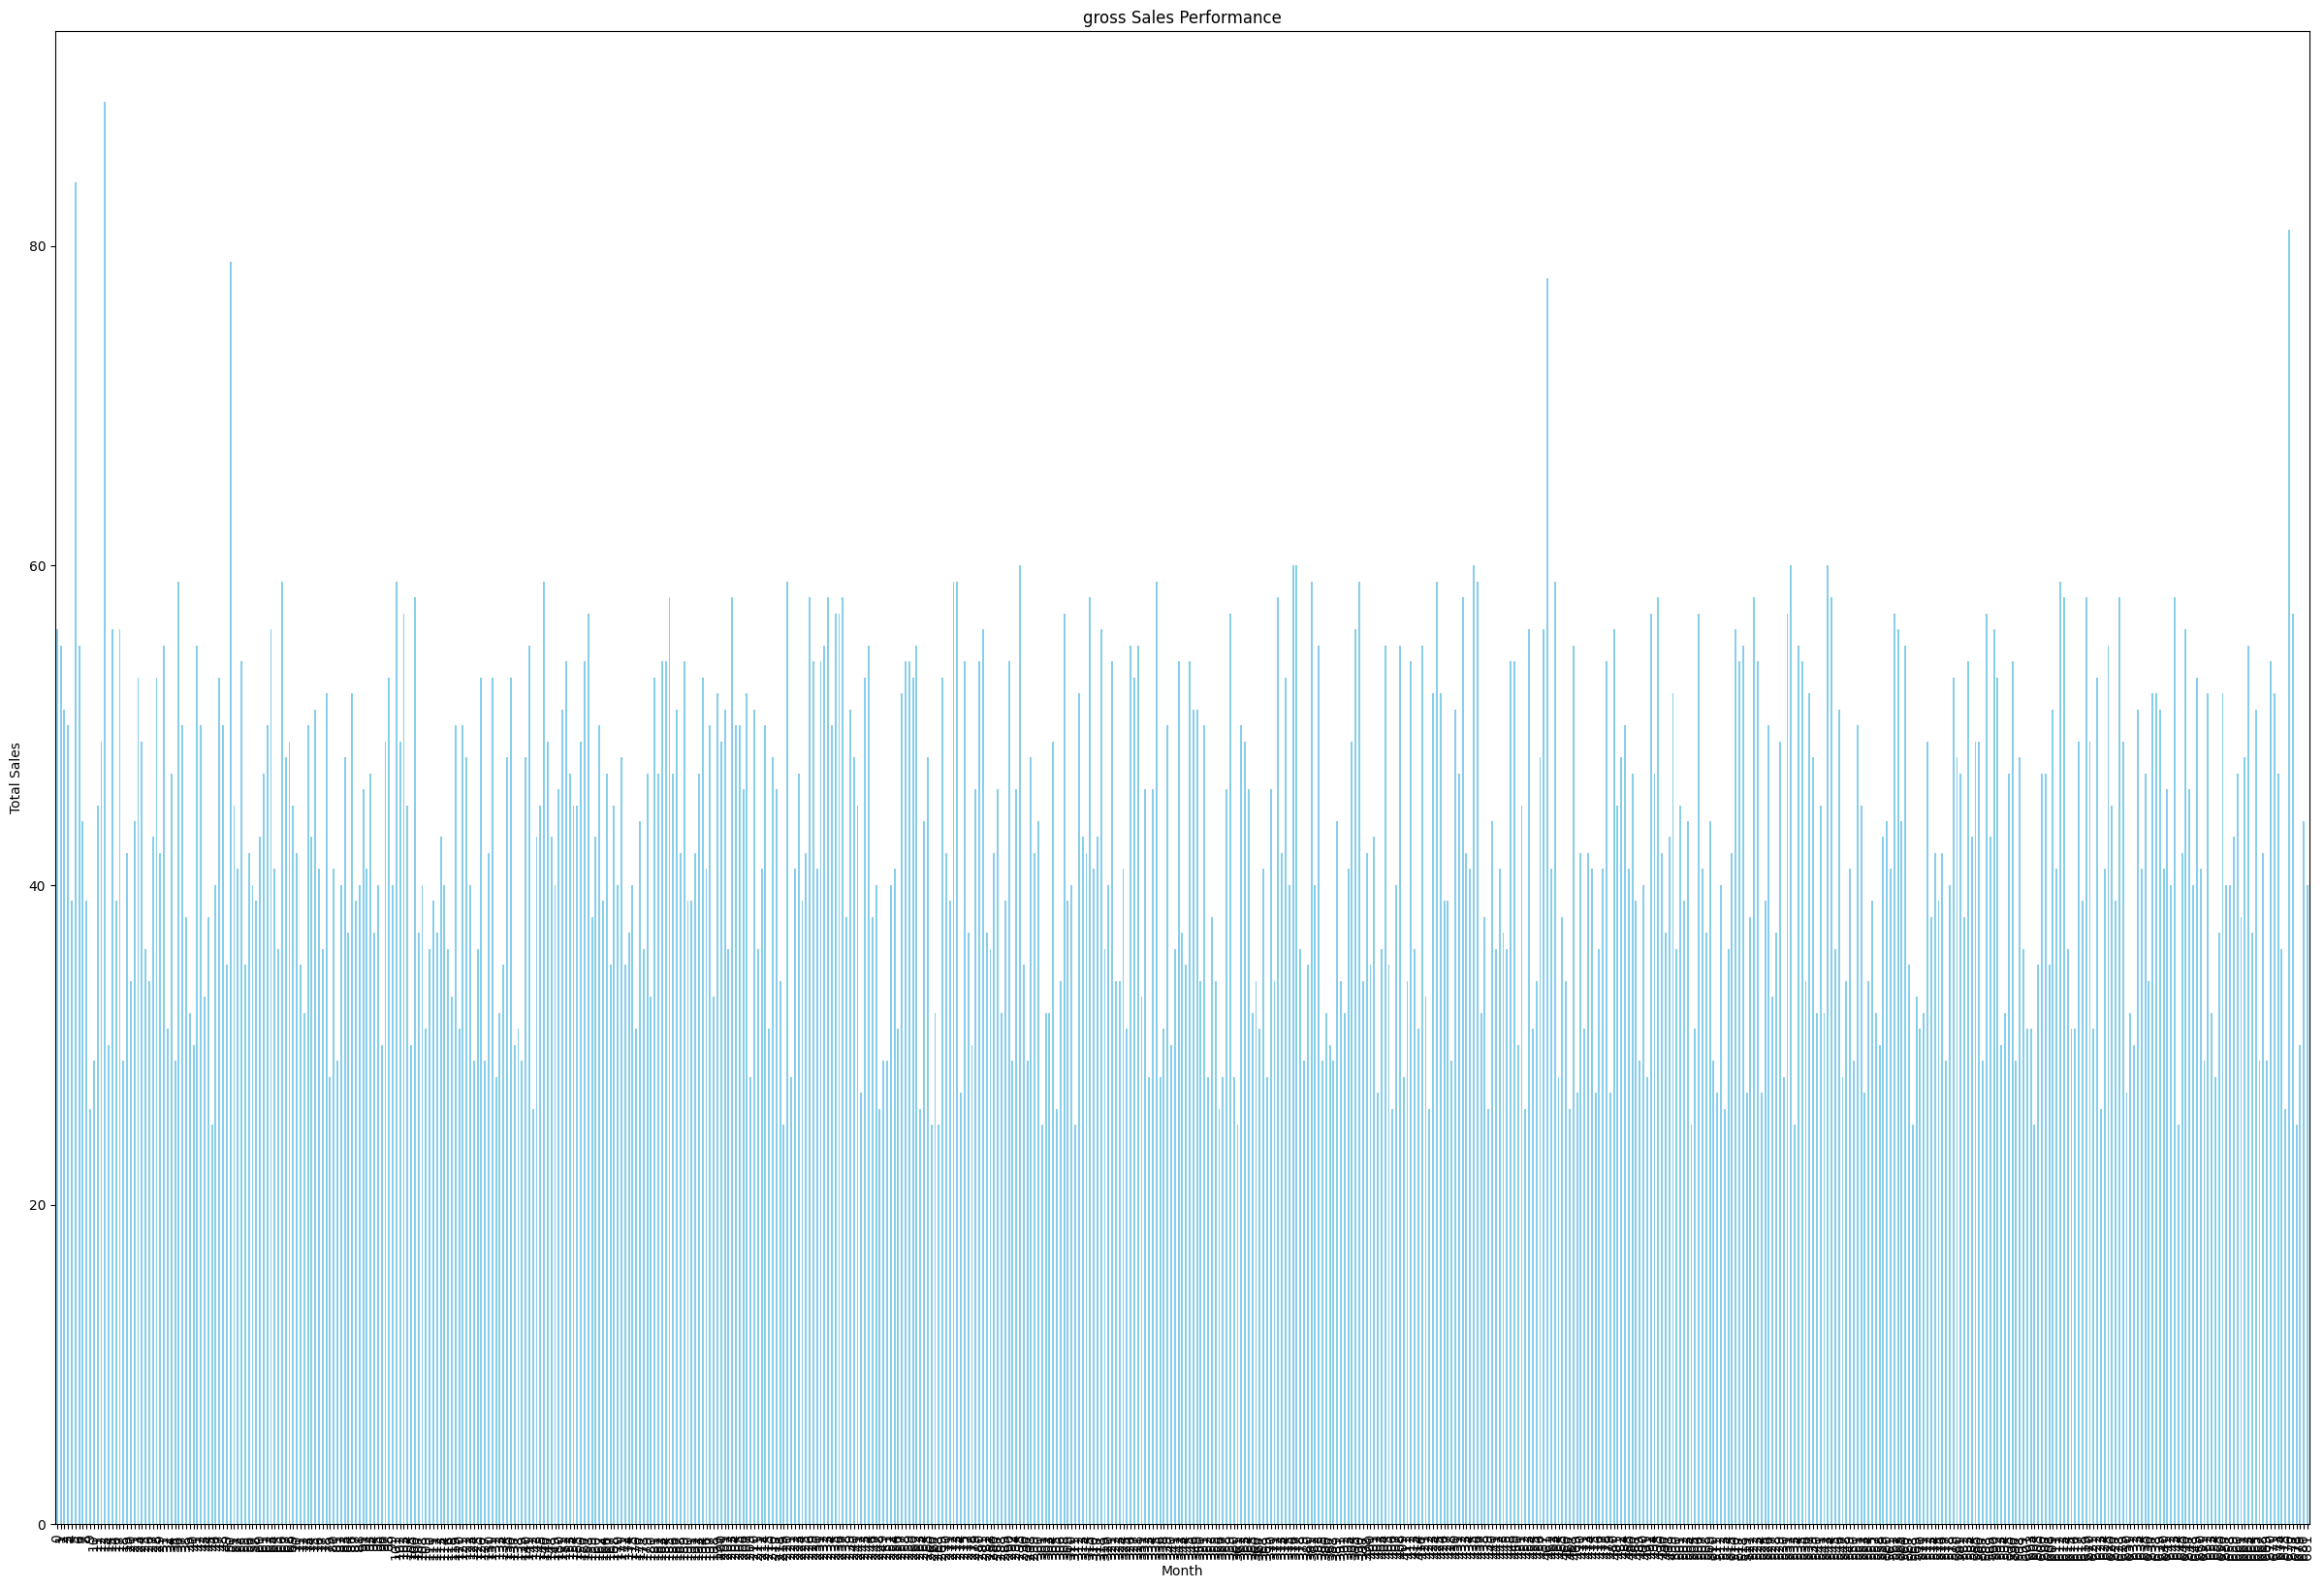

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 20))

# Plot monthly sales as a bar chart
df3['Gross_Sale'].plot(kind='bar', color='skyblue')
plt.title('gross Sales Performance')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

as the bar graph is so conjust we can use line braph foe better visualization


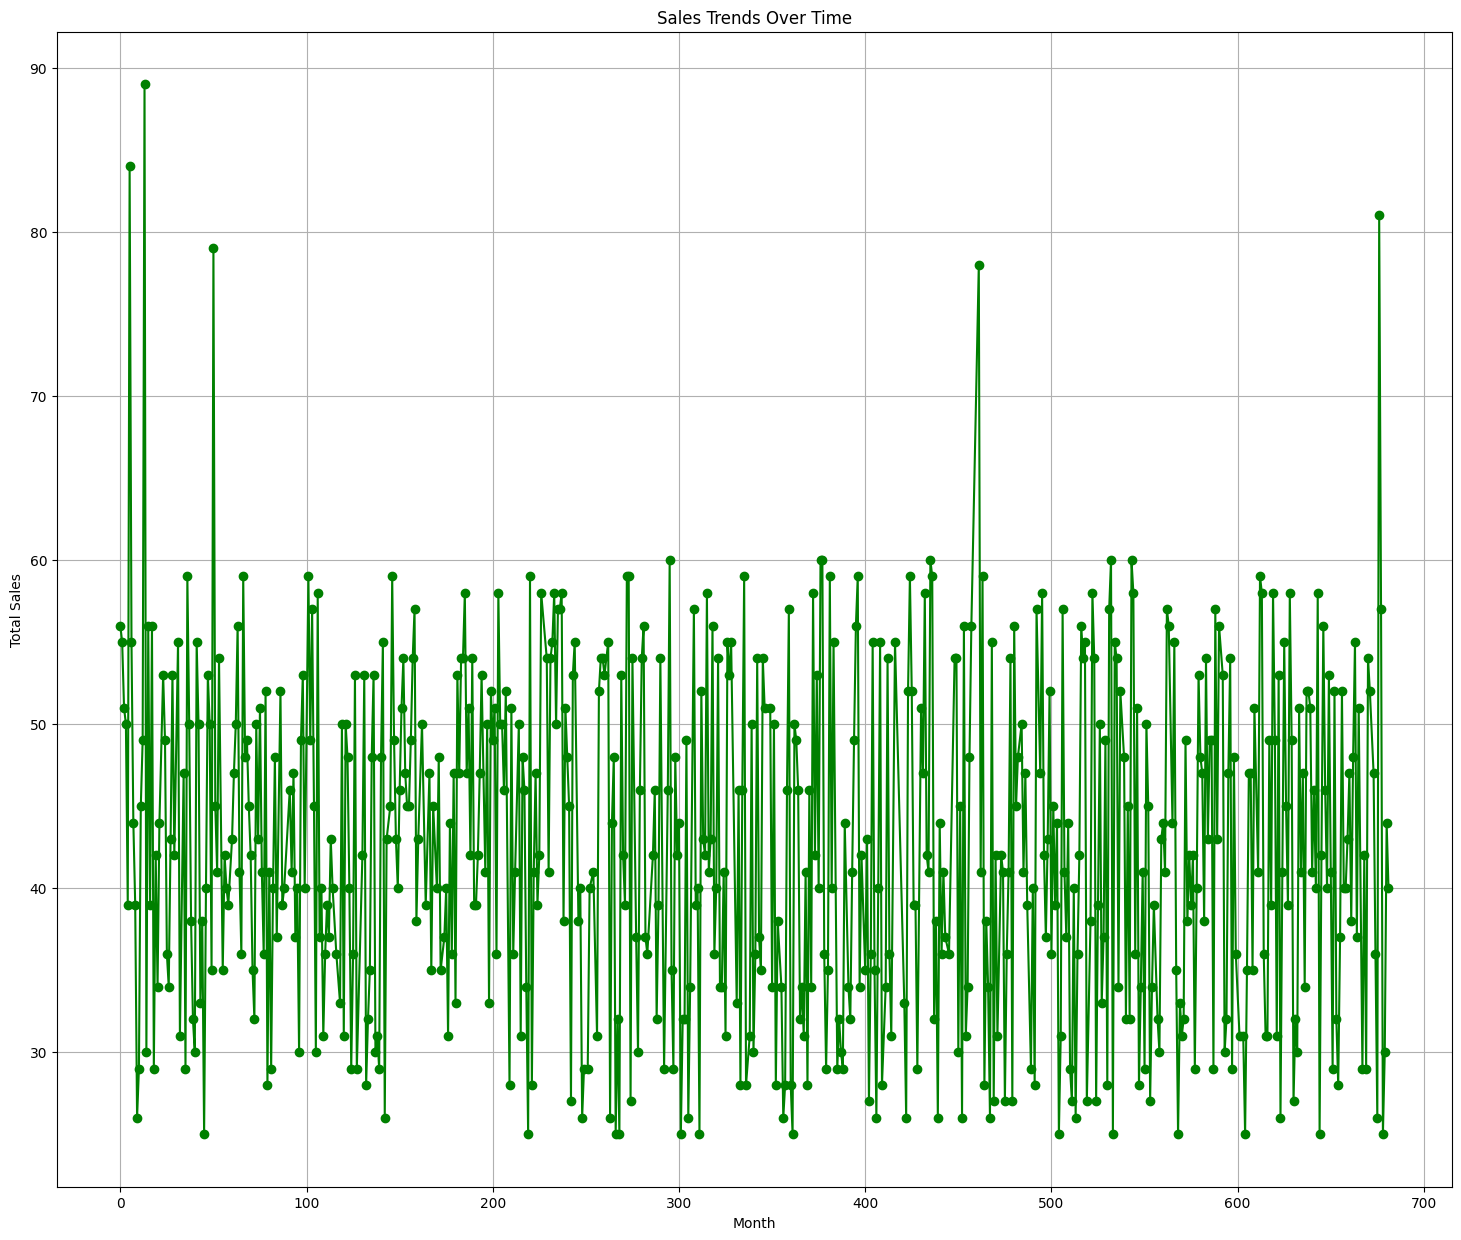

In [14]:
# Plot  sales as a line plot
plt.figure(figsize=(18, 15))
df3['Gross_Sale'].plot(kind='line', marker='o', color='green')
plt.title('Sales Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [18]:
df3.columns

Index(['S.No', 'Coles_StoreID', 'Expec_Revenue', 'Gross_Sale', 'Sales_Cost',
       'Targeted_Quarter', 'Coles_Forecast', 'Store_Location',
       'Customer_Count', 'Staff_Count', 'Store_Area'],
      dtype='object')

➢ Optional: Identify top-performing products or regions.

In [24]:
# Group by 'Coles_StoreID' and sum 'Gross_Sale'
top_stores_by_sales = df3.groupby(['Coles_StoreID','Store_Area'])['Gross_Sale'].sum().reset_index(name='total gross').sort_values(by =['total gross'],ascending=False)

# Display top 10 stores
print("Top 10 Stores by Gross Sales:")
print(top_stores_by_sales.head(10))

Top 10 Stores by Gross Sales:
    Coles_StoreID  Store_Area  total gross
541          C721        2500           89
536          C713        2500           84
481          C649        2500           81
589          C777        2700           79
457          C625        2500           78
366          C525        2700           60
106          C221        2700           60
467          C635        2700           60
476          C644        2700           60
405          C567        2700           60
